## Libraries Import

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

## Upload and Read from File
*   Load the dataset from a file for analysis.
*   Display the first few rows and data shape of the dataset to understand its structure.


In [47]:
from google.colab import files
upload= files.upload()

Saving University students mental health Data.csv to University students mental health Data (1).csv


In [48]:
df= pd.read_csv('University students mental health Data.csv')

In [49]:
df.head()

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?",...,"2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


In [50]:
df.shape

(1977, 39)

## Cleaning Data
*   Handle missing values and remove duplicates.
*   Format and standardize columns for consistency.
*   Ensure the dataset is ready for analysis.




In [51]:
df.columns

Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ',
       '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ',
       '3. In a semester, how often have you had trouble relaxing due to academic pressure? ',
       '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?',
       '5. In a semester, how often have you worried too much about academic affairs? ',
       '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?',
       '7. In a semester, how often have you felt afraid, as if something awful might happen?',
       'Anxiety Value', 'Anxiety Label',
       '1. In a semester, how often have you felt upset due

In [52]:
column_mapping = {
    "1. Age":"Age",
    "2. Gender":"Gender",
    "3. University":"University",
    "4. Department":"Department",
    "5. Academic Year":"Academic Year",
    "6. Current CGPA":"Current CGPA",
    '7. Did you receive a waiver or scholarship at your university?': 'Waiver/Scholarship',
    '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ': 'Nervous/Anxious',
    '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ': 'Worrying',
    '3. In a semester, how often have you had trouble relaxing due to academic pressure? ': 'Trouble Relaxing ',
    '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?': 'Easily Annoyed',
    '5. In a semester, how often have you worried too much about academic affairs? ': 'Excessive Worry ',
    '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?': 'Restless',
    '7. In a semester, how often have you felt afraid, as if something awful might happen?': 'Fearful ',
    'Anxiety Value': 'Anxiety Value',
    'Anxiety Label': 'Anxiety Label',
    '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ': 'Upset',
    '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?': 'Lack of Control',
    '3. In a semester, how often you felt nervous and stressed because of academic pressure? ': 'Nervous/Stress ',
    '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ': 'Inadequate Coping',
    '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?': 'Confident',
    '6. In a semester, how often you felt as if things in your academic life is going on your way? ': 'Things Going Well',
    '7. In a semester, how often are you able to control irritations in your academic / university affairs? ': 'Control Irritations',
    '8. In a semester, how often you felt as if your academic performance was on top?': 'Top Performance',
    '9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control? ': 'Angered by Performance',
    '10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them? ': 'Overwhelmed',
    'Stress Value': 'Stress Value',
    'Stress Label': 'Stress Label',
    '1. In a semester, how often have you had little interest or pleasure in doing things?': 'Lack of Interest',
    '2. In a semester, how often have you been feeling down, depressed or hopeless?': 'Feeling Down',
    '3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much? ': 'Sleep Issues',
    '4. In a semester, how often have you been feeling tired or having little energy? ': 'Fatigue',
    '5. In a semester, how often have you had poor appetite or overeating? ': 'Appetite Issues',
    '6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down? ': 'Self-Doubt',
    '7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television? ': 'Concentration Issues',
    '8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you\'ve been moving a lot more than usual because you\'ve been restless? ': 'Movement Issues',
    '9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself? ': 'Suicidal Thoughts',
    "Depression Value":"Depression Value",
    "Depression Label":"Depression Label"
}

df.rename(columns=column_mapping, inplace=True)

df.columns

Index(['Age', 'Gender', 'University', 'Department', 'Academic Year',
       'Current CGPA', 'Waiver/Scholarship', 'Nervous/Anxious', 'Worrying',
       'Trouble Relaxing ', 'Easily Annoyed', 'Excessive Worry ', 'Restless',
       'Fearful ', 'Anxiety Value', 'Anxiety Label', 'Upset',
       'Lack of Control', 'Nervous/Stress ', 'Inadequate Coping', 'Confident',
       'Things Going Well', 'Control Irritations', 'Top Performance',
       'Angered by Performance', 'Overwhelmed', 'Stress Value', 'Stress Label',
       'Lack of Interest', 'Feeling Down', 'Sleep Issues', 'Fatigue',
       'Appetite Issues', 'Self-Doubt', 'Concentration Issues',
       'Movement Issues', 'Suicidal Thoughts', 'Depression Value',
       'Depression Label'],
      dtype='object')

In [53]:
df.head()

,Age,Gender,University,Department,Academic Year,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


In [54]:
#unique values
for col in df.columns:
  print(f"Column: {col}")
  print(df[col].value_counts())
  print("\n")


Column: Age
Age
18-22       1273
23-26        673
27-30         24
Below 18       4
Above 30       3
Name: count, dtype: int64


Column: Gender
Gender
Male                 1372
Female                595
Prefer not to say      10
Name: count, dtype: int64


Column: University
University
Independent University, Bangladesh (IUB)                      584
American International University Bangladesh (AIUB)           529
Islamic University of Technology (IUT)                        278
Dhaka University (DU)                                         202
Dhaka University of Engineering and Technology (DUET)         164
North South University (NSU)                                   91
Patuakhali Science and Technology University                   36
Bangladesh University of Engineering and Technology (BUET)     32
East West University (EWU)                                     19
Rajshahi University of Engineering and Technology (RUET)       13
Rajshahi University (RU)                             

In [55]:
#Remove Records with Limited Information
conditions_to_drop = (
    (df['Age'] == 'Below 18') |
    (df['Age'] == 'Above 30') |
    (df['Gender'] == 'Prefer not to say') |
    (df['Department'] == 'Engineering - Other') |
    (df['Department'] == 'Pharmacy and Public Health') |
    (df['Department'] == 'Law and Human Rights') |
    (df['Department'] == 'Liberal Arts and Social Sciences')
)
df = df[~conditions_to_drop]

In [56]:
department_mapping = {
    'Engineering - CS / CSE / CSC / Similar to CS': 'CS/IT Engineering',
    'Other': 'Other', # this don't need mapping so'll keep it as it is
    'Engineering - EEE/ ECE / Similar to EEE': 'EEE/ECE Engineering',
    'Environmental and Life Sciences': 'Env/Life Sciences',
    'Business and Entrepreneurship Studies': 'Business/Entrepreneurship',
    'Biological Sciences': 'Biological Sciences',# this don't need mapping so'll keep it as it is
    'Engineering - Civil Engineering / Similar to CE': 'Civil Engineering',
    'Engineering - Mechanical Engineering / Similar to ME': 'Mechanical Engineering'
}

Academic_year_mapping ={
    'Fourth Year or Equivalent': 4,
    'First Year or Equivalent': 1,
    'Third Year or Equivalent': 3,
    'Second Year or Equivalent': 2,
    'Other': -1            #placeholder for others
}

age_mapping = {
    '18-22': 20,
    '23-26': 25,
    '27-30': 28
}

cgpa_mapping = {
    'Below 2.50': 2.0,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.39': 3.20,
    '3.40 - 3.79': 3.60,
    '3.80 - 4.00': 3.90,
    'Other': -1             #placeholder for others
}

df['Department'] = df['Department'].map(department_mapping)
df['Academic Year'] = df['Academic Year'].map(Academic_year_mapping)
df['Age'] = df['Age'].map(age_mapping)
df['Current CGPA'] = df['Current CGPA'].map(cgpa_mapping)

In [57]:
df.duplicated().sum()

3

In [58]:
df[df.duplicated()]


,Age,Gender,University,Department,Academic Year,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
1304,20,Male,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.6,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
1342,20,Male,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.6,Yes,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
1363,20,Male,American International University Bangladesh (...,CS/IT Engineering,3,3.2,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


In [59]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [60]:
df.isnull().sum()

,0
Age,0
Gender,0
University,0
Department,0
Academic Year,0
Current CGPA,0
Waiver/Scholarship,0
Nervous/Anxious,0
Worrying,0
Trouble Relaxing,0


In [61]:
numerica_columns = df.select_dtypes(exclude="object").columns
categorical_columns = df.select_dtypes(include="object").columns

print("Numerical Columns:")
print(numerica_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['Age', 'Academic Year', 'Current CGPA', 'Nervous/Anxious', 'Worrying',
       'Trouble Relaxing ', 'Easily Annoyed', 'Excessive Worry ', 'Restless',
       'Fearful ', 'Anxiety Value', 'Upset', 'Lack of Control',
       'Nervous/Stress ', 'Inadequate Coping', 'Confident',
       'Things Going Well', 'Control Irritations', 'Top Performance',
       'Angered by Performance', 'Overwhelmed', 'Stress Value',
       'Lack of Interest', 'Feeling Down', 'Sleep Issues', 'Fatigue',
       'Appetite Issues', 'Self-Doubt', 'Concentration Issues',
       'Movement Issues', 'Suicidal Thoughts', 'Depression Value'],
      dtype='object')

Categorical Columns:
Index(['Gender', 'University', 'Department', 'Waiver/Scholarship',
       'Anxiety Label', 'Stress Label', 'Depression Label'],
      dtype='object')


In [62]:
df.dtypes

,0
Age,int64
Gender,object
University,object
Department,object
Academic Year,int64
Current CGPA,float64
Waiver/Scholarship,object
Nervous/Anxious,int64
Worrying,int64
Trouble Relaxing,int64


## Visualization

*   Created charts and graphs to represent the data visually.
*   Showcased important patterns and relationships in the data.




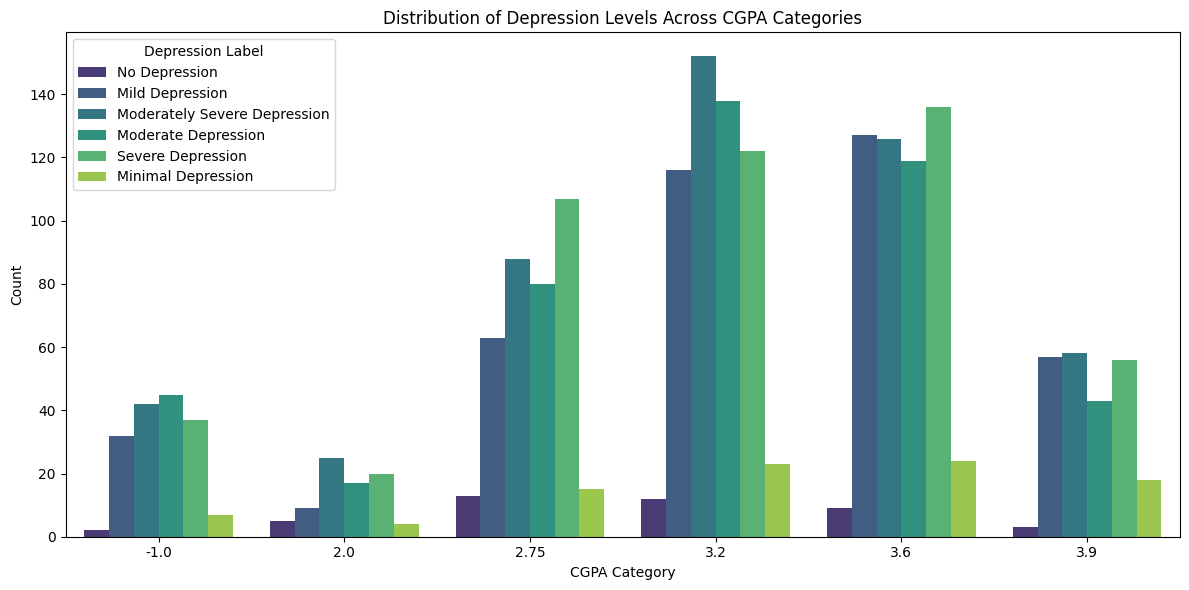

In [63]:
# Creating the visualization for depression levels across CGPA categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Current CGPA', hue='Depression Label', palette='viridis')
plt.title("Distribution of Depression Levels Across CGPA Categories")
plt.xlabel("CGPA Category")
plt.ylabel("Count")
plt.legend(title="Depression Label")
plt.tight_layout()

plt.show()

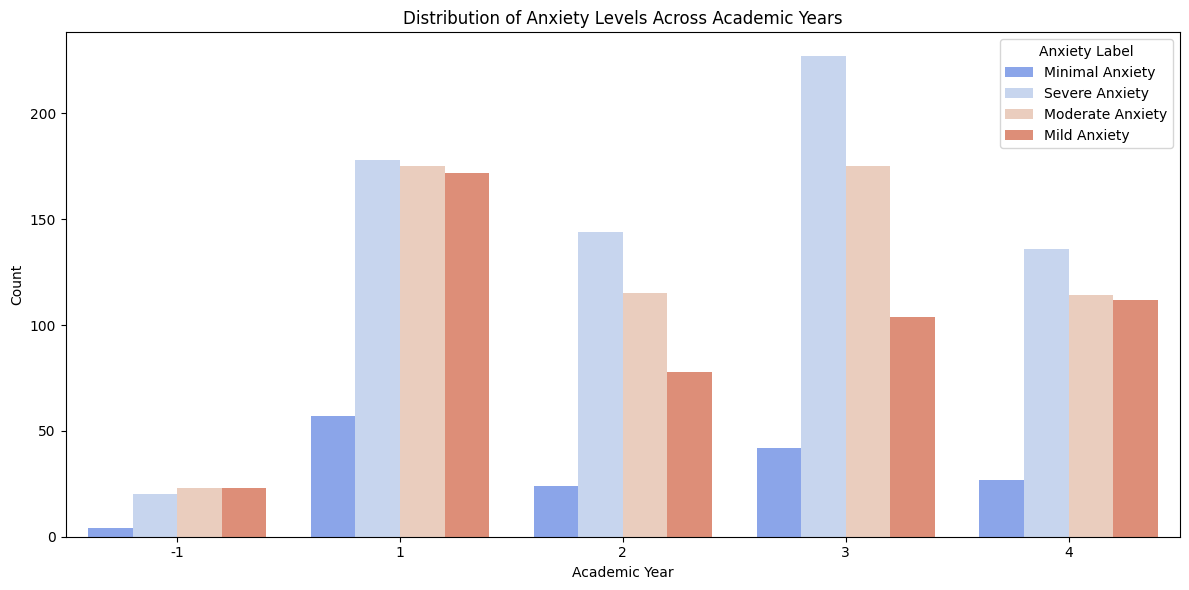

In [64]:
filtered_data_anxiety =df['Academic Year']

# Creating the visualization for anxiety levels across academic years without the '-1' values
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Academic Year", hue="Anxiety Label", palette="coolwarm")
plt.title("Distribution of Anxiety Levels Across Academic Years")
plt.xlabel("Academic Year")
plt.ylabel("Count")
plt.legend(title="Anxiety Label")
plt.tight_layout()

plt.show()

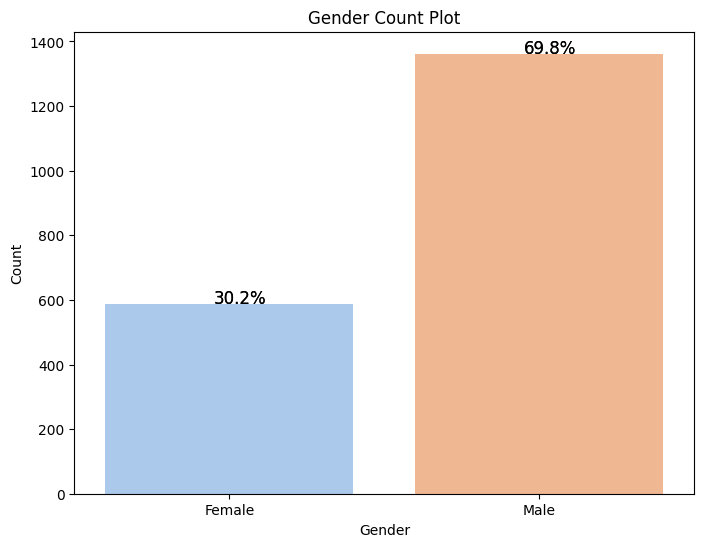

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='pastel')
ax = sns.countplot(data=df, x='Gender', palette='pastel')

# Add title and labels
plt.title('Gender Count Plot')
plt.xlabel('Gender')
plt.ylabel('Count')

# Calculate percentages and add them to the plot
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

# Show the plot
plt.show()


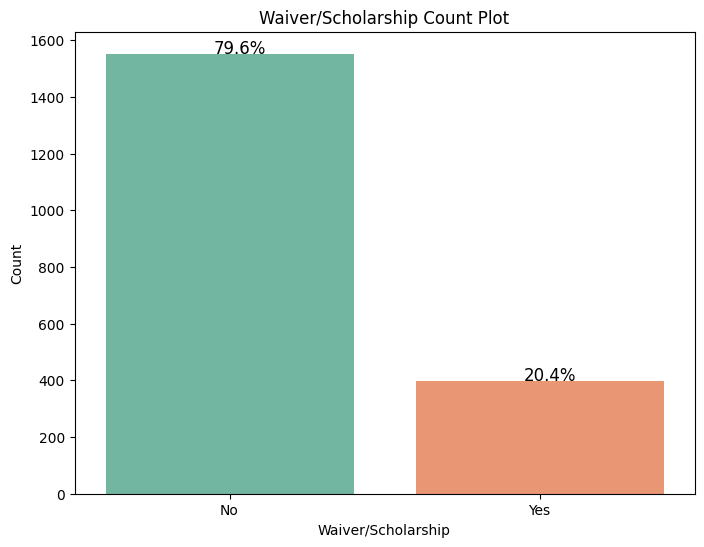

In [66]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Waiver/Scholarship', palette='Set2')

# Add title and labels
plt.title('Waiver/Scholarship Count Plot')
plt.xlabel('Waiver/Scholarship')
plt.ylabel('Count')

# Calculate percentages and add them to the plot
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

# Show the plot
plt.show()

## 1st Hypothesis Testing

*   Null Hypothesis (H₀): There is no difference in anxiety levels between male and female students.

*   Alternative Hypothesis (H₁): There is a difference in anxiety levels between male and female students.



In [67]:
df.columns

Index(['Age', 'Gender', 'University', 'Department', 'Academic Year',
       'Current CGPA', 'Waiver/Scholarship', 'Nervous/Anxious', 'Worrying',
       'Trouble Relaxing ', 'Easily Annoyed', 'Excessive Worry ', 'Restless',
       'Fearful ', 'Anxiety Value', 'Anxiety Label', 'Upset',
       'Lack of Control', 'Nervous/Stress ', 'Inadequate Coping', 'Confident',
       'Things Going Well', 'Control Irritations', 'Top Performance',
       'Angered by Performance', 'Overwhelmed', 'Stress Value', 'Stress Label',
       'Lack of Interest', 'Feeling Down', 'Sleep Issues', 'Fatigue',
       'Appetite Issues', 'Self-Doubt', 'Concentration Issues',
       'Movement Issues', 'Suicidal Thoughts', 'Depression Value',
       'Depression Label'],
      dtype='object')

In [68]:
from statsmodels.stats.weightstats import ztest

# Extracting anxiety levels for males and females
male_anxiety = df[df['Gender'] == 'Male']['Anxiety Value']
female_anxiety = df[df['Gender'] == 'Female']['Anxiety Value']

# Calculate the sample means
mean_male_anxiety = male_anxiety.mean()
mean_female_anxiety = female_anxiety.mean()

# Perform the z-test
z_stat, p_value = ztest(male_anxiety, female_anxiety)

# Output the results of the z-test and sample means
print(f"Sample Mean (Male Anxiety): {mean_male_anxiety:.4f}")
print(f"Sample Mean (Female Anxiety): {mean_female_anxiety:.4f}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4e}")  # Exponential notation for better readability

# Determine if the p-value is significant
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the alpha level (0.05).")
    print("We reject the null hypothesis (H₀).")
    print("This suggests that there is a statistically significant difference in anxiety levels between male and female students.")
else:
    print("The p-value is greater than or equal to the alpha level (0.05).")
    print("We fail to reject the null hypothesis (H₀).")
    print("This suggests that there is no statistically significant difference in anxiety levels between male and female students.")


Sample Mean (Male Anxiety): 11.8473
Sample Mean (Female Anxiety): 13.3588
Z-statistic: -5.6299
P-value: 1.8034e-08
The p-value is less than the alpha level (0.05).
We reject the null hypothesis (H₀).
This suggests that there is a statistically significant difference in anxiety levels between male and female students.


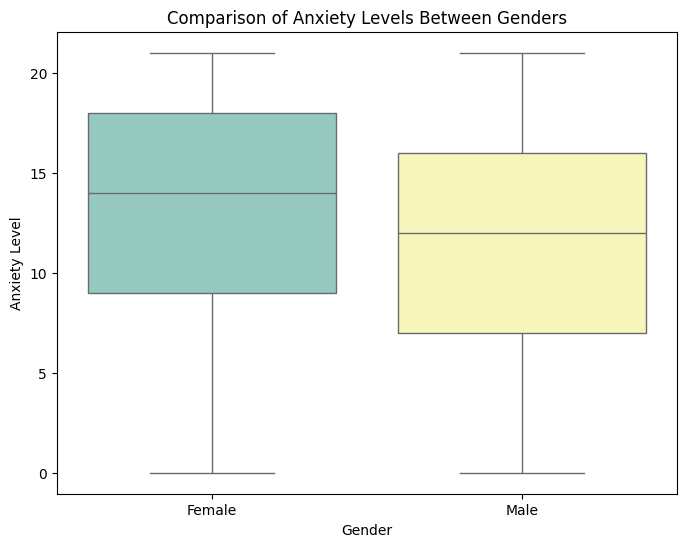

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Anxiety Value', data=df, palette="Set3")
plt.title('Comparison of Anxiety Levels Between Genders')
plt.xlabel('Gender')
plt.ylabel('Anxiety Level')
plt.show()

## 2nd Hypothesis Testing


*   Null Hypothesis (H₀): TThe frequency of appetite issues (poor appetite or overeating) does not have a significant impact on depression levels among students.

*  Alternative Hypothesis (H₁): The frequency of appetite issues (poor appetite or overeating) has a significant impact on depression levels among students.



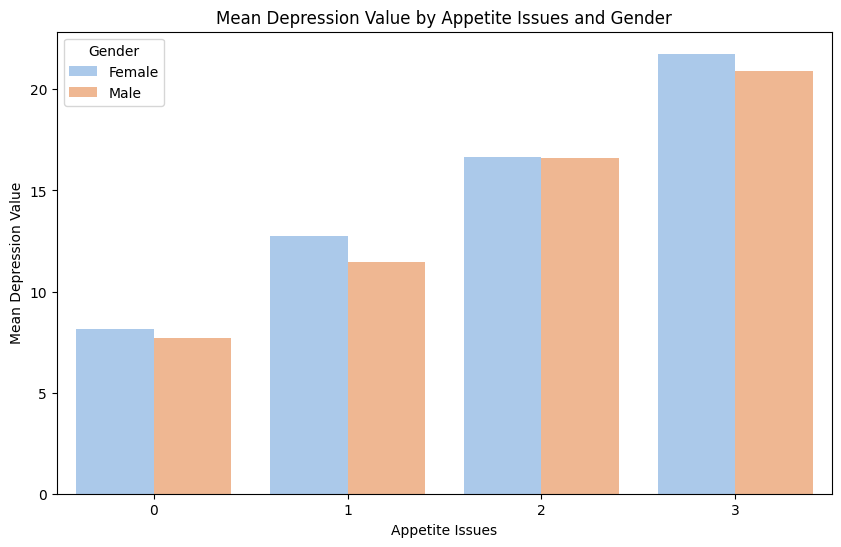

In [70]:
# between 'Appetite Issues' and 'Depression Value' grouped by 'Gender'

# Group the data by 'Gender' and 'Appetite Issues', and calculate the mean 'Depression Value'
grouped_data = df.groupby(['Gender', 'Appetite Issues'])['Depression Value'].mean().reset_index()

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Appetite Issues', y='Depression Value', hue='Gender', data=grouped_data, palette='pastel')
plt.title('Mean Depression Value by Appetite Issues and Gender')
plt.xlabel('Appetite Issues')
plt.ylabel('Mean Depression Value')
plt.legend(title='Gender')
plt.show()


In [71]:
# Group the data by Gender and Appetite
groups = df.groupby(['Gender', 'Appetite Issues'])['Depression Value'].apply(list)

# Perform one-way ANOVA for each group
f_value, p_value = f_oneway(*groups)

# Print the F-value and p-value
print(f'F-value: {f_value}, P-value: {p_value}')

# Compare the p-value with alpha and conclude
if p_value < 0.05:
    print("The p-value is less than the alpha level , We reject the null hypothesis.")
    print("This suggests that there is a statistically significant effect of Gender, Appetite Issues, and their interaction on Depression values.")
else:
    print("The p-value is greater than or equal to the alpha level. We fail to reject the null hypothesis.")
    print("This suggests that there is no statistically significant effect of Gender, Appetite Issues, and their interaction on Depression values.")


F-value: 287.52409589449763, P-value: 2.052332594264456e-294
The p-value is less than the alpha level , We reject the null hypothesis.
This suggests that there is a statistically significant effect of Gender, Appetite Issues, and their interaction on Depression values.
